In [1]:
from algorithms import UCB
import numpy as np
import sys
from util.constants import JointFeatureMode
from util import utility_functions
import matplotlib.pyplot as plt

import logging
logging.basicConfig(stream=sys.stdout, format='%(asctime)s | %(name)s (%(levelname)s):\t %(message)s')

In [2]:
repitition_num = 50
parametrizations = utility_functions.get_parameterization_saps()
features = utility_functions.get_features_saps()
running_time = utility_functions.get_run_times_saps()
regret_ucb = np.zeros((repitition_num, features.shape[0]))
execution_time_ucb = np.zeros(repitition_num)

## Upper Confidence Bound (baseline)

In [ ]:
for rep in range(repitition_num):
    print(f"Rep no.: {rep + 1}")
    ucb = UCB(random_state=np.random.RandomState(515), parametrizations=parametrizations, features=features, running_time=running_time)
    ucb.run()
    regret_ucb[rep] = ucb.get_regret()
    execution_time_ucb[rep] = ucb.execution_time

In [4]:
# regret = ucb.get_regret().astype("float64")
print(regret_ucb.shape)
np.savetxt('regret_ucb.txt', regret_ucb)

(50, 5000)


In [2]:
regret_50_ucb = np.loadtxt('regret_ucb.txt')
regret_50_colstim = np.loadtxt('regret_colstim_saps.txt')
regret_50_ucb.shape, regret_50_colstim.shape

((50, 5000), (50, 5000))

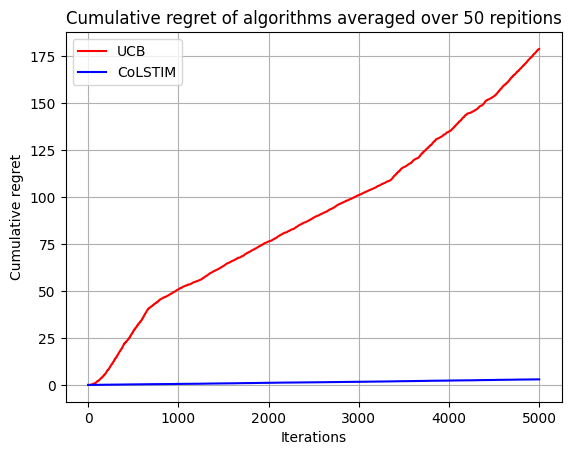

In [17]:
from util.metrics import compute_cumm_reg
cum_reg_ucb = compute_cumm_reg(regret_50_ucb)
cum_reg_colstim = compute_cumm_reg(regret_50_colstim)

colors = ["red", "blue"]

plt.plot(np.mean(cum_reg_ucb, axis=0), color=colors[0], label="UCB")
# plt.fill_between(
#     range(len(cum_reg_ucb[0])), 
#     np.mean(cum_reg_ucb, axis=0)-np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
#     np.mean(cum_reg_ucb, axis=0)+np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
#     color=colors[1],
#     alpha=0.2
# )

plt.plot(np.mean(cum_reg_colstim, axis=0), color=colors[1], label="CoLSTIM")
# plt.fill_between(
#     range(len(cum_reg_colstim[0])), 
#     np.mean(cum_reg_colstim, axis=0)-np.std(cum_reg_colstim, axis=0)/np.sqrt(len(cum_reg_colstim)), 
#     np.mean(cum_reg_colstim, axis=0)+np.std(cum_reg_colstim, axis=0)/np.sqrt(len(cum_reg_colstim)), 
#     color=colors[1],
#     alpha=0.5
# )
plt.xlabel("Iterations")
plt.ylabel("Cumulative regret")
plt.title("Cumulative regret of algorithms averaged over 50 repitions")
plt.legend()
plt.grid()
plt.show()

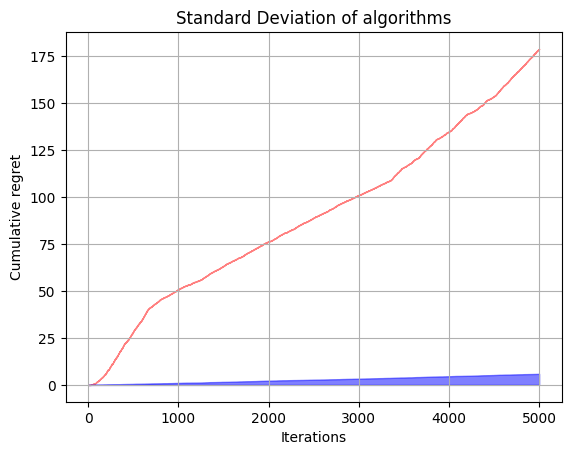

In [18]:
plt.fill_between(
    range(len(cum_reg_ucb[0])), 
    np.mean(cum_reg_ucb, axis=0)-np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
    np.mean(cum_reg_ucb, axis=0)+np.std(cum_reg_ucb, axis=0)/np.sqrt(len(cum_reg_ucb)), 
    color=colors[0],
    alpha=0.5,
    label="UCB"
)

plt.fill_between(
    range(len(cum_reg_colstim[0])), 
    np.mean(cum_reg_colstim, axis=0)-np.std(cum_reg_colstim, axis=0)/np.sqrt(len(cum_reg_colstim)), 
    np.mean(cum_reg_colstim, axis=0)+np.std(cum_reg_colstim, axis=0)/np.sqrt(len(cum_reg_colstim)), 
    color=colors[1],
    alpha=0.5,
    label="CoLSTIM"
)
plt.xlabel("Iterations")
plt.ylabel("Cumulative regret")
plt.title("Standard Deviation of algorithms")
plt.grid()
plt.show()

In [20]:
from util.constants import Solver


for solver in Solver:
    print(solver.value)

saps
mips


# Testing utility code

In [ ]:
from util.utility_functions import get_run_times_mips
get_run_times_mips().shape

In [ ]:
winners = []
for skill in running_time:
    winners.append(np.argmax(skill))

In [11]:
non_winner_selection = dict()
for i, selection in enumerate(ucb.temp_selec):
    if winners[i] in selection:
        pass
    else:
        non_winner_selection[i] = f"{winners[i]} + {selection}"
len(non_winner_selection)

2903